In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pylab as plt
from PyAstronomy import pyasl
import two_body_utils 
import astropy.units as u
import astropy.constants as const



In [2]:
#Solver for Kepler's equation

# Instantiate the solver
ks = pyasl.MarkleyKESolver()

# Solves Kepler's Equation for a set
# of mean anomaly and eccentricity.
# Uses the algorithm presented by
# Markley 1995.
print("Eccentric anomaly: ", ks.getE(two_body_utils.M, two_body_utils.e))

Eccentric anomaly:  1.4444173612360682


Shape of output array:  (200, 3)
x, y, z for the 200 th point:  [-0.71193635  1.07228404  0.18262962]


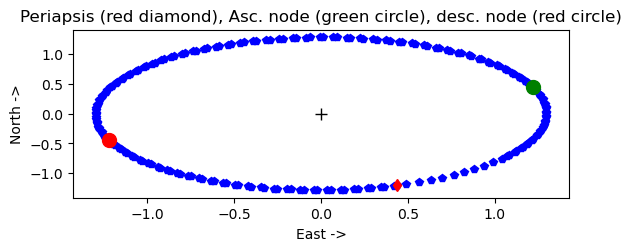

In [3]:
#Calculate the Orbit

# Instantiate a Keplerian elliptical orbit (ke) with
# semi-major axis of 1.3 length units,
# a period of 2 time units, eccentricity of 0.5,
# longitude of ascending node of 70 degrees (angle between a reference direction,
# usually x-axis, and the ascending node, giving 3D orbital orientation) 
# inclination of 10 degrees 
# periapsis argument of 110 deg (angle between ascending node, 
# where the orbiting body crosses the reference plane going north, and the periapsis)
ke = pyasl.KeplerEllipse(1.3, 1., e=0, Omega=70., i=10.0, w=90.0)

# Get a time axis
# np.linspace(start,stop,num)
# Returns num intervals on [start, stop]
t = np.linspace(0, 1.9, two_body_utils.n_int)

# Calculate the orbit position at the given points
# in a Cartesian coordinate system.
pos = ke.xyzPos(t)
print("Shape of output array: ", pos.shape)

# x, y, and z coordinates for the nth time point
print("x, y, z for the",two_body_utils.n_int,"th point: ", pos[two_body_utils.n_int - 1, ::])

# Calculate orbit radius as a function of the
radius = ke.radius(t)

# Calculate velocity on orbit
vel = ke.xyzVel(t)

# Find the nodes of the orbit (Observer at -z)
ascn, descn = ke.xyzNodes_LOSZ()

# Plot x and y coordinates of the orbit
plt.subplot(2, 1, 1)
plt.title("Periapsis (red diamond), Asc. node (green circle), desc. node (red circle)")
plt.xlabel("East ->")
plt.ylabel("North ->")
plt.plot([0], [0], 'k+', markersize=9)
plt.plot(pos[::, 1], pos[::, 0], 'bp')
# Point of periapsis
plt.plot([pos[0, 1]], [pos[0, 0]], 'rd')
# Nodes of the orbit
plt.plot([ascn[1]], [ascn[0]], 'go', markersize=10)
plt.plot([descn[1]], [descn[0]], 'ro', markersize=10)

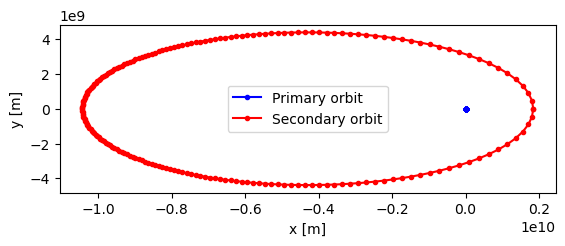

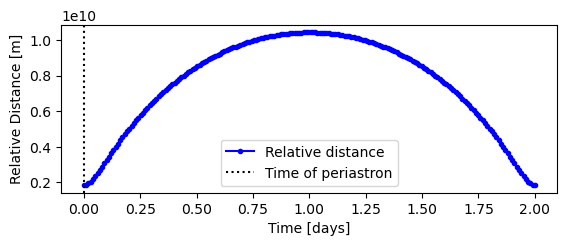

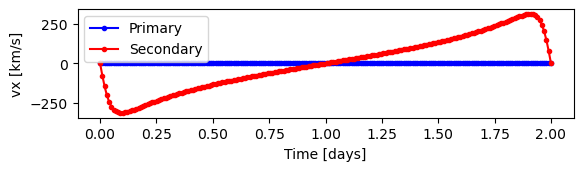

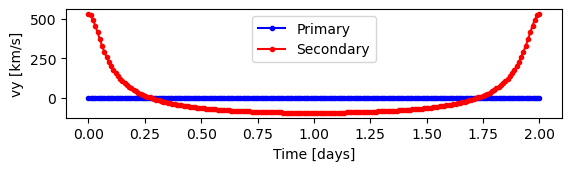

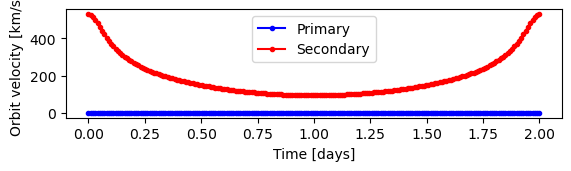

In [4]:
#Calculate Binary Orbits

# Calculate binary orbit
bo = pyasl.BinaryOrbit(two_body_utils.m2m1, two_body_utils.mtot, 
                       two_body_utils.per, two_body_utils.e, 
                       two_body_utils.tau, two_body_utils.Omega, two_body_utils.w, two_body_utils.i)

ke1 = bo.getKeplerEllipse_primary()
ke2 = bo.getKeplerEllipse_secondary()

# Binary orbit plot
# Input time in seconds
t = np.linspace(two_body_utils.tau, two_body_utils.per, two_body_utils.n_int) * 86400

r1, r2 = bo.xyzPos(t)
v1, v2 = bo.xyzVel(t)

plt.subplot(2,1,1)
plt.plot(r1[::,0], r1[::,1], 'b.-', label="Primary orbit")
plt.plot(r2[::,0], r2[::,1], 'r.-', label="Secondary orbit")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.legend()
plt.show()
print()
print()

# Relative distance of masses (centers)
rd = np.sqrt(np.sum((r1-r2)**2, axis=1))
plt.subplot(2,1,2)
plt.plot(t/86400, rd, 'b.-', label="Relative distance")
plt.axvline(two_body_utils.tau, ls=':', c='k', label="Time of periastron")
plt.xlabel("Time [days]")
plt.ylabel("Relative Distance [m]")
plt.legend()
plt.show()
print()
print()

# x-velocity
plt.subplot(3,1,1)
plt.plot(t/86400, v1[::,0]/1e3, 'b.-', label="Primary")
plt.plot(t/86400, v2[::,0]/1e3, 'r.-', label="Secondary")
plt.xlabel("Time [days]")
plt.ylabel("vx [km/s]")
plt.legend()
plt.show()
print()

# y-velocity
plt.subplot(3,1,2)
plt.plot(t/86400, v1[::,1]/1e3, 'b.-', label="Primary")
plt.plot(t/86400, v2[::,1]/1e3, 'r.-', label="Secondary")
plt.xlabel("Time [days]")
plt.ylabel("vy [km/s]")
plt.legend()
plt.show()
print()

# Orbit velocities
plt.subplot(3,1,3)
ov1 = np.sqrt(np.sum(v1**2, axis=1))
ov2 = np.sqrt(np.sum(v2**2, axis=1))
plt.plot(t/86400, ov1/1e3, 'b.-', label="Primary")
plt.plot(t/86400, ov2/1e3, 'r.-', label="Secondary")
plt.xlabel("Time [days]")
plt.ylabel("Orbit velocity [km/s]")
plt.legend()
plt.show()


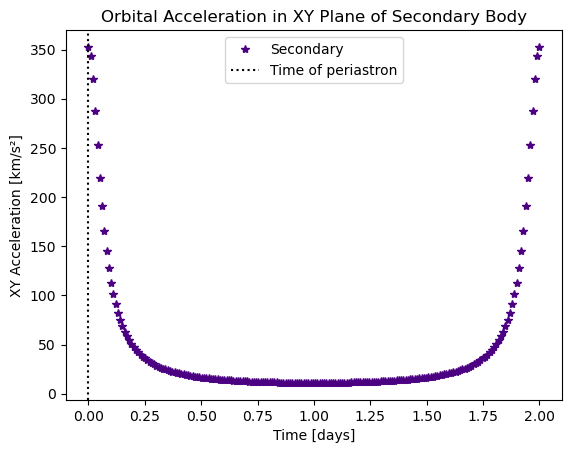

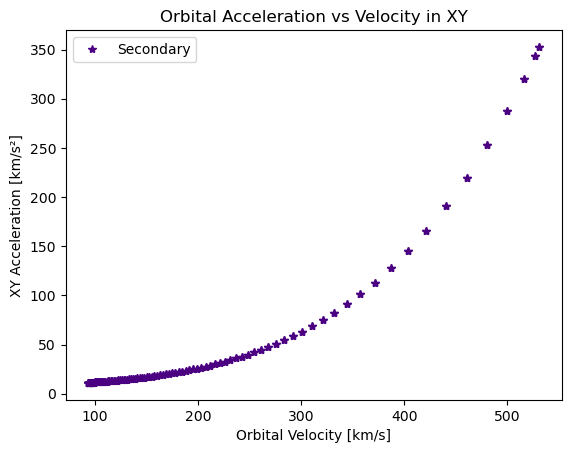

In [5]:
# Plot xy orbital acceleration vs time of the secondary body 
a_xy_secondary = two_body_utils.xy_orbital_acceleration_secondary(rd=rd)
plt.plot(t / 86400, a_xy_secondary, '*', label="Secondary", color = "indigo")
plt.xlabel("Time [days]")
plt.ylabel("XY Acceleration [km/s²]")
plt.title("Orbital Acceleration in XY Plane of Secondary Body")
plt.axvline(two_body_utils.tau, ls=':', c='k', label="Time of periastron")
plt.legend()
plt.show()

# Plot xy orbital acceleration vs xy orbital velocity of the secondary body 
plt.plot(ov2/1e3, a_xy_secondary, '*', label="Secondary", color = "indigo")
plt.xlabel("Orbital Velocity [km/s]")
plt.ylabel("XY Acceleration [km/s²]")
plt.title("Orbital Acceleration vs Velocity in XY")
plt.legend()
plt.show()

In [6]:
# 2d velocities:
# Measured v2D A: (113.0±1.1) km s−1 B: (66.6±4.1) km s−1 C: (94.9±1.7) km s−1 D: (77.9±2.0) km s−1 E: (69.6±0.8) km s−1 F: (67.4±0.4) km s−1 G: (66.2±1.9) km s−1
v2D = np.array([113.0, 66.6, 94.9, 77.9, 69.6, 67.4, 66.2]) * u.km / u.s
v2D_err = np.array([1.1, 4.1, 1.7, 2.0, 0.8, 0.4, 1.9]) * u.km / u.s

In [7]:
# Acceleration R.A. [mas/yr^2] -0.0069±0.0083 (0.8σ) 0.0702±0.0239 (2.9σ) 0.0028±0.0333 (0.1σ) 0.0357±0.0177 (2.0σ) 0.0072±0.0042 (1.7σ) 0.0052±0.0038 (1.4σ)  -0.0197±0.0267 (0.7σ)
a_ra = (np.array([-0.0069, 0.0702, 0.0028, 0.0357, 0.0072, 0.0052, -0.0197]))* u.mas/ u.yr**2
a_ra_err = (np.array([0.0083, 0.0239, 0.0333, 0.0177, 0.0042, 0.0038, 0.0267])) * u.mas / u.yr**2

# Acceleration Dec. [mas/yr^2] 0.0085±0.0098 (0.9σ) 0.0228±0.0157 (1.5σ) -0.0060±0.0123 (0.5σ) -0.0194±0.0162 (1.2σ) -0.0009±0.0075 (0.1σ) -0.0015±0.0038 (0.4σ) 0.0173±0.0170 (1.0σ)
a_dec = (np.array([0.0085, 0.0228, -0.0060, -0.0194, -0.0009, -0.0015, 0.0173]))* u.mas/ u.yr**2
a_dec_err = (np.array([0.0098, 0.0157, 0.0123, 0.0162, 0.0075, 0.0038, 0.0170])) * u.mas / u.yr**2

# Acceleration in the plane of the sky [mas/yr^2]
a_prop = (np.array([0.0109, 0.0759, 0.0066, 0.0406, 0.0073, 0.0054, 0.0262]))*u.mas/ u.yr**2
a_prop_err = (np.array([0.0092, 0.0229, 0.0180, 0.0174, 0.0043, 0.0038, 0.0230]))*u.mas/ u.yr**2


NameError: name 'colors' is not defined

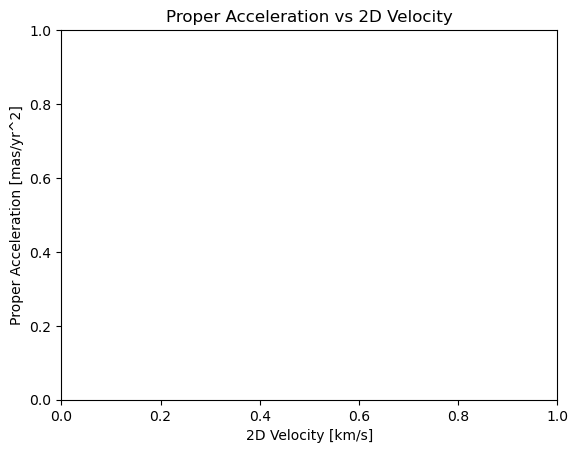

In [8]:
from datetime import datetime

# Plot proper acceleration [mas/yr^2] vs 2D velocities [km/s]
plt.xlabel("2D Velocity [km/s]")
plt.ylabel("Proper Acceleration [mas/yr^2]")
plt.title("Proper Acceleration vs 2D Velocity")
colours = ["red", "orange", "yellow", "green", "blue", "indigo", "violet"]
labels = ["A", "B", "C", "D", "E", "F", "G"]
for i in range(len(colours)):
    plt.errorbar(
        x=v2D[i],
        y=a_prop[i],
        yerr=a_prop_err[i],
        marker="*",
        label=labels[i],
        color=colors[i],
    )
plt.legend(title='Stars')

# Generate timestamped named file
plot_name = "Proper Acceleration vs 2D Velocity "
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
filename = rf"C:\Users\macke\OneDrive - Saint Marys University\Summer Research 2025\Plots\{plot_name}{timestamp}.png"

# Save and show the plot
plt.savefig(filename)
plt.show()